# Pylops - Sympy

### Author: M.Ravasi

In this notebook I will showcase the ``describe`` method of PyLops. This method allows turning a PyLops operator into a nice looking mathematical expression, which can be useful both for teaching and debugging purposes.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import sympy as s
s.init_printing()

from pylops.basicoperators import HStack, VStack, BlockDiag, Block
from pylops.utils.describe import describe

In [2]:
import pylops

A = pylops.MatrixMult(np.ones((10, 5)))
A.name = 'A'
B = pylops.Diagonal(np.ones(5))
B.name = 'A'
C = pylops.MatrixMult(np.ones((10, 5)))
C.name = 'C'

In [3]:
describe(A)

where: {'A': 'MatrixMult'}


In [4]:
AT = A.T
describe(AT)

where: {'A': 'MatrixMult'}


In [5]:
AT = A.H
describe(AT)

where: {'A': 'MatrixMult'}


In [6]:
AT = 3*A
describe(AT)

where: {'A': 'MatrixMult'}


In [7]:
AT = 3*A.H
describe(AT)

where: {'A': 'MatrixMult'}


In [8]:
D = A + C
describe(D)

where: {'A': 'MatrixMult', 'C': 'MatrixMult'}


In [9]:
D = A * B
describe(D)

where: {'A': 'MatrixMult', 'B': 'Diagonal'}


In [10]:
E = D * B
describe(E)

where: {'A': 'MatrixMult', 'B': 'Diagonal'}


In [11]:
F = (A + C) * B + A
describe(F)

where: {'A': 'MatrixMult', 'C': 'MatrixMult', 'B': 'Diagonal'}


In [12]:
F = VStack((A, B))
describe(F)

where: {'A': 'MatrixMult', 'B': 'Diagonal'}


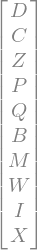

where: {'D': 'Diagonal', 'C': 'Diagonal', 'Z': 'Diagonal', 'P': 'Diagonal', 'Q': 'Diagonal', 'B': 'Diagonal', 'M': 'Diagonal', 'W': 'Diagonal', 'I': 'Diagonal', 'X': 'Diagonal'}


In [13]:
F1 = VStack([pylops.Diagonal(i*np.ones(10)) for i in range(10)])
describe(F1)

In [14]:
G = HStack((A*B, C*B))
describe(G)

where: {'A': 'MatrixMult', 'B': 'Diagonal', 'C': 'MatrixMult'}


In [15]:
G1 = HStack([pylops.Diagonal(i*np.ones(10)) for i in range(10)])
describe(G1)

where: {'D': 'Diagonal', 'Q': 'Diagonal', 'T': 'Diagonal', 'J': 'Diagonal', 'R': 'Diagonal', 'F': 'Diagonal', 'C': 'Diagonal', 'B': 'Diagonal', 'M': 'Diagonal', 'X': 'Diagonal'}


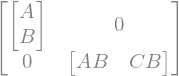

where: {'A': 'MatrixMult', 'B': 'Diagonal', 'C': 'MatrixMult'}


In [16]:
H = BlockDiag((F, G))
describe(H)

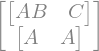

where: {'A': 'MatrixMult', 'B': 'Diagonal', 'C': 'MatrixMult'}


In [17]:
H = Block([[A*B, C],[A,A]])
describe(H)

In [18]:
L = pylops.Laplacian((10, 7), weights=(2, 4),)
describe(L)

where: {'S': 'SecondDerivative', 'R': 'SecondDerivative'}


In [19]:
L = pylops.signalprocessing.Shift((10, 20), 5)
describe(L)

where: {'S': 'LinearOperator'}


In [20]:
L = pylops.avo.poststack.PoststackLinearModelling(np.ones(4), 10, )
describe(L)

where: {'C': 'Convolve1D', 'F': 'FirstDerivative'}


In [21]:
L = pylops.avo.poststack.PoststackLinearModelling(np.ones(4), 10, spatdims=(5, 3))
describe(L)

where: {'C': 'Convolve1D', 'F': 'FirstDerivative'}


In [22]:
L = pylops.avo.prestack.PrestackLinearModelling(np.ones(4), np.arange(10), 10, spatdims=(5, 3))
describe(L)

where: {'C': 'Convolve1D', 'A': 'AVOLinearModelling', 'F': 'FirstDerivative'}
